# Bitcoin Price Prediction - 7

GROUP MEMBERS:
Can Korkmaz-28068, 
Mehmet Can Türkmen-29544, 
Utku Alkan-28227

# Introduction

---
The goal of this project is to forecast the price of Bitcoin in the future. Bitcoin is a digital money that has grown in popularity and continues to do so every day. Making a prediction regarding the Bitcoin price would allow investors to plan wiser tactics and avoid losing money. In order to develop such a forecast, we will first explore and analyze our datasets, then perform statistical analysis, and then create a machine learning model that meets our goal using the data we provide.


# Describing the Dataset
---

In [206]:
# The datasets we're using can be found in the links below.
# BTC-USD.csv: https://www.kaggle.com/c/bitcoin/data. This dataset contains information from 9/17/2014 to 4/2/2022.
# We can observe informations from Open, Close, Low, High, Volume and Adj Close
# coin_Bitcoin.csv: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory. This dataset contains information from 2013.

In [2]:
# Install the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

df = pd.read_csv("BTC-USD.csv", parse_dates=True) 
df1 = pd.read_csv("coin_Bitcoin.csv", index_col=0, parse_dates=True)

In [3]:
# Adds previous to dataset from other dataset
check = df['Date'][0].split('-')
count = 0
for a in df1.index:
  check2 = df1['Date'][a].split('-')
  if int(check[2]) > int(check2[2][0:2]) and int(check[0]) > int(check2[0]) and int(check[1]) > int(check2[1]):
    df = pd.DataFrame(np.insert(df.values, count, values=[(check2[0]+ '-'+ check2[1] + '-' + check2[2][0:2]),df1['Open'][a],df1['High'][a],df1['Low'][a],df1['Close'][a],None,None] , axis=0),columns = df.columns)
  elif int(check[1]) > int(check2[1]) and int(check[0]) > int(check2[0]):
    df = pd.DataFrame(np.insert(df.values, count, values=[(check2[0]+ '-'+ check2[1] + '-' + check2[2][0:2]),df1['Open'][a],df1['High'][a],df1['Low'][a],df1['Close'][a],None,None] , axis=0),columns = df.columns)       
  elif int(check[0]) > int(check2[0]):
    df = pd.DataFrame(np.insert(df.values, count, values=[(check2[0]+ '-'+ check2[1] + '-' + check2[2][0:2]),df1['Open'][a],df1['High'][a],df1['Low'][a],df1['Close'][a],None,None] , axis=0),columns = df.columns)
  count = count + 1

In [4]:
#Adds new column to dataset that calls "Marketcap"
df.set_index(np.arange(1,3003),inplace = True)
df['Marketcap'] = df1['Marketcap']
df.set_index('Date',inplace = True)
df.index = pd.to_datetime(df.index)

In [5]:
#Add High and low diffrences to dataset
df['High-Low-Diff'] = df.High - df.Low

In [6]:
#Add Volume as group of 20
df["Volume_group"] = df['Volume'].fillna(0)
df["Volume_group"] = pd.cut(df["Volume_group"],20)

In [7]:
#Add Close and Open diffrences to dataset
df['Open-Close-Diff'] = df.Close - df.Open

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Marketcap,High-Low-Diff,Volume_group,Open-Close-Diff
Date,,,,,,,,,,
2013-04-29,134.444,147.488007,134.0,144.539993,None,None,1.603769e+09,13.488007,"(-350967941.479, 17548397073.95]",10.095993
2013-04-30,144.0,146.929993,134.050003,139.0,None,None,1.542813e+09,12.87999,"(-350967941.479, 17548397073.95]",-5.0
2013-05-01,139.0,139.889999,107.720001,116.989998,None,None,1.298955e+09,32.169998,"(-350967941.479, 17548397073.95]",-22.010002
2013-05-02,116.379997,125.599998,92.281898,105.209999,None,None,1.168517e+09,33.3181,"(-350967941.479, 17548397073.95]",-11.169998
2013-05-03,106.25,108.127998,79.099998,97.75,None,None,1.085995e+09,29.028,"(-350967941.479, 17548397073.95]",-8.5


We can observe all data from open price to volume for the early years

In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Marketcap,High-Low-Diff,Volume_group,Open-Close-Diff
Date,,,,,,,,,,
2022-03-29,47100.4375,48022.289063,47100.4375,47465.730469,47465.730469,31397059069,NaN,921.851563,"(17548397073.95, 35096794147.9]",365.292969
2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,NaN,908.9375,"(17548397073.95, 35096794147.9]",-394.234375
2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,NaN,2121.488281,"(17548397073.95, 35096794147.9]",-1523.472657
2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,NaN,2213.101563,"(35096794147.9, 52645191221.85]",727.480468
2022-04-02,46168.101563,47003.429688,46157.980469,46508.101563,46508.101563,35441143808,NaN,845.449219,"(35096794147.9, 52645191221.85]",340.0


We can observe all data including open to volume for late years

In [10]:
df.shape

(3002, 10)

In [11]:
df.describe()

,Marketcap
count,2.991000e+03
mean,1.208761e+11
std,2.109438e+11
min,7.784112e+08
25%,6.305579e+09
50%,3.741503e+10
75%,1.499957e+11
max,1.186364e+12


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3002 entries, 2013-04-29 to 2022-04-02
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Open             3002 non-null   object  
 1   High             3002 non-null   object  
 2   Low              3002 non-null   object  
 3   Close            3002 non-null   object  
 4   Adj Close        2755 non-null   object  
 5   Volume           2755 non-null   object  
 6   Marketcap        2991 non-null   float64 
 7   High-Low-Diff    3002 non-null   object  
 8   Volume_group     3002 non-null   category
 9   Open-Close-Diff  3002 non-null   object  
dtypes: category(1), float64(1), object(8)
memory usage: 238.3+ KB


In [13]:
df.isna().sum() / df.shape[0]

Open               0.000000
High               0.000000
Low                0.000000
Close              0.000000
Adj Close          0.082278
Volume             0.082278
Marketcap          0.003664
High-Low-Diff      0.000000
Volume_group       0.000000
Open-Close-Diff    0.000000
dtype: float64

We have very small null values for volume and adj close which comes from the second dataset we concatanated from the second dataset.

# Explaratory Data Analysis

##  **Visualizing only the open price**

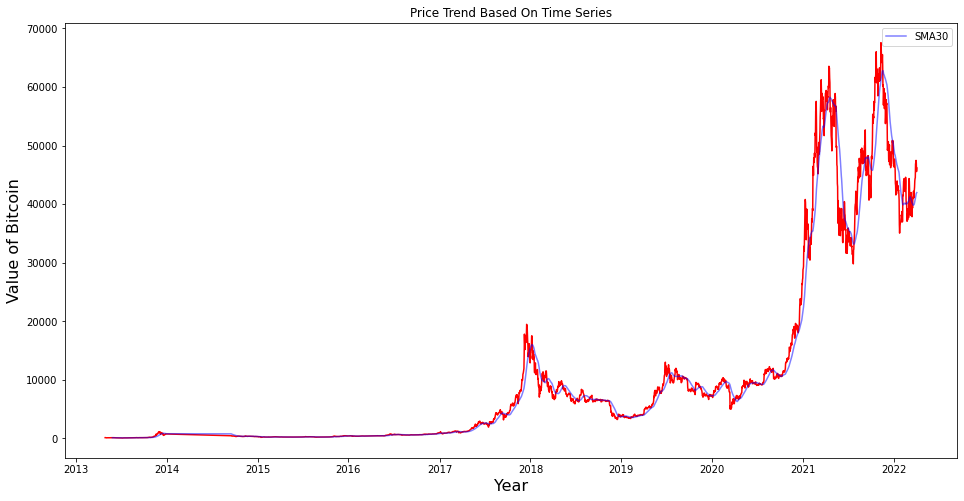

In [14]:
plt.figure(figsize=(16, 8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Value of Bitcoin", fontsize=16)
plt.title("Price Trend Based On Time Series")
plt.plot(df.Open, color="red", linestyle="-")
ll = df.Open.rolling(window=30).mean()
plt.plot(ll, color="blue", linestyle="-", label="SMA30", alpha=0.5 )
plt.legend()
plt.show()

Opening price of Bitcoin between 2013-2022. Bitcoin appears to has always been in either neutral trend or an upwards trend. The first peak in 2018 has carrier the price of Bitcoin to above 17.527 USD at its highset, and at the end of 2018 it was being being valued just above 7000 USD, just one tenth of its highest ever valuation at October 2021. 



## **Visualizing price trends based on time series in one chart**

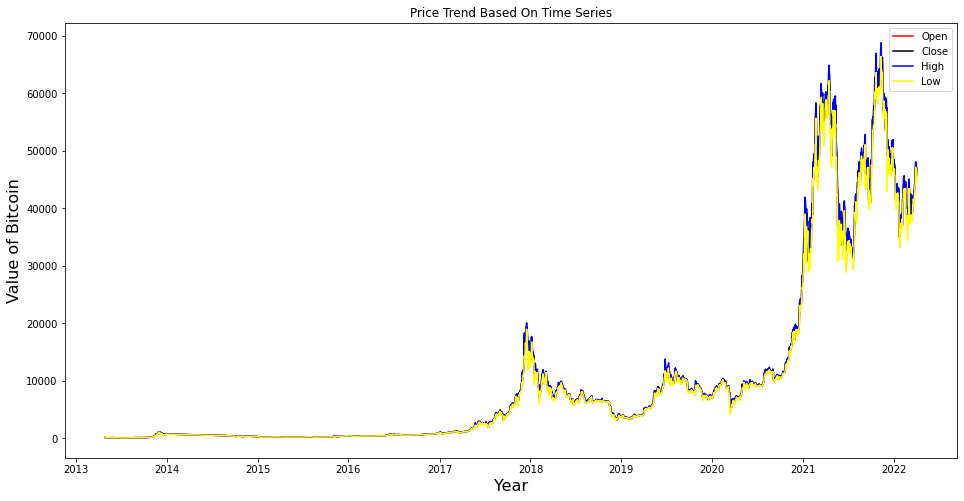

In [15]:
plt.figure(figsize=(16, 8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Value of Bitcoin", fontsize=16)
plt.title("Price Trend Based On Time Series")
plt.plot(df.Open, color="red", linestyle="-")
plt.plot(df.Close, color="black", linestyle="-")
plt.plot(df.High, color="blue", linestyle="-")
plt.plot(df.Low, color="yellow", linestyle="-")
plt.legend(['Open', 'Close', 'High', 'Low'])
plt.show()

In this figure, we can observe the opening, closing, low and high values of bitcoin based on time series, simply by observing how all four plots align on top of one another. From this, it's clear that all four categories follow the same trend. According to the trends, Bitcoin's price trends increased tremendously after 2017 and peaked in 2021. The price of Bitcoin appears to drop to 50000 in 2022, but the trend prior to 2022 shows that even if the price of the digital currency lowers after its peak, it still manages to rise higher than its peak value after some time, so we can forecast that the price will begin to rise later in 2022. Prior to 2017, price trends were lower than 10,000 and fluctuated between 300 and 500. Based on these findings, it can be stated that Bitcoin became incredibly popular in 2017 and 2018, and that this popularity resulted in a massive growth in price trends each year, with its ups and downs. Although the price appears to be reducing at the moment, this is unlikely to last and it will begin to rise later this year.  

## **Visualize each feature separately based on time series**

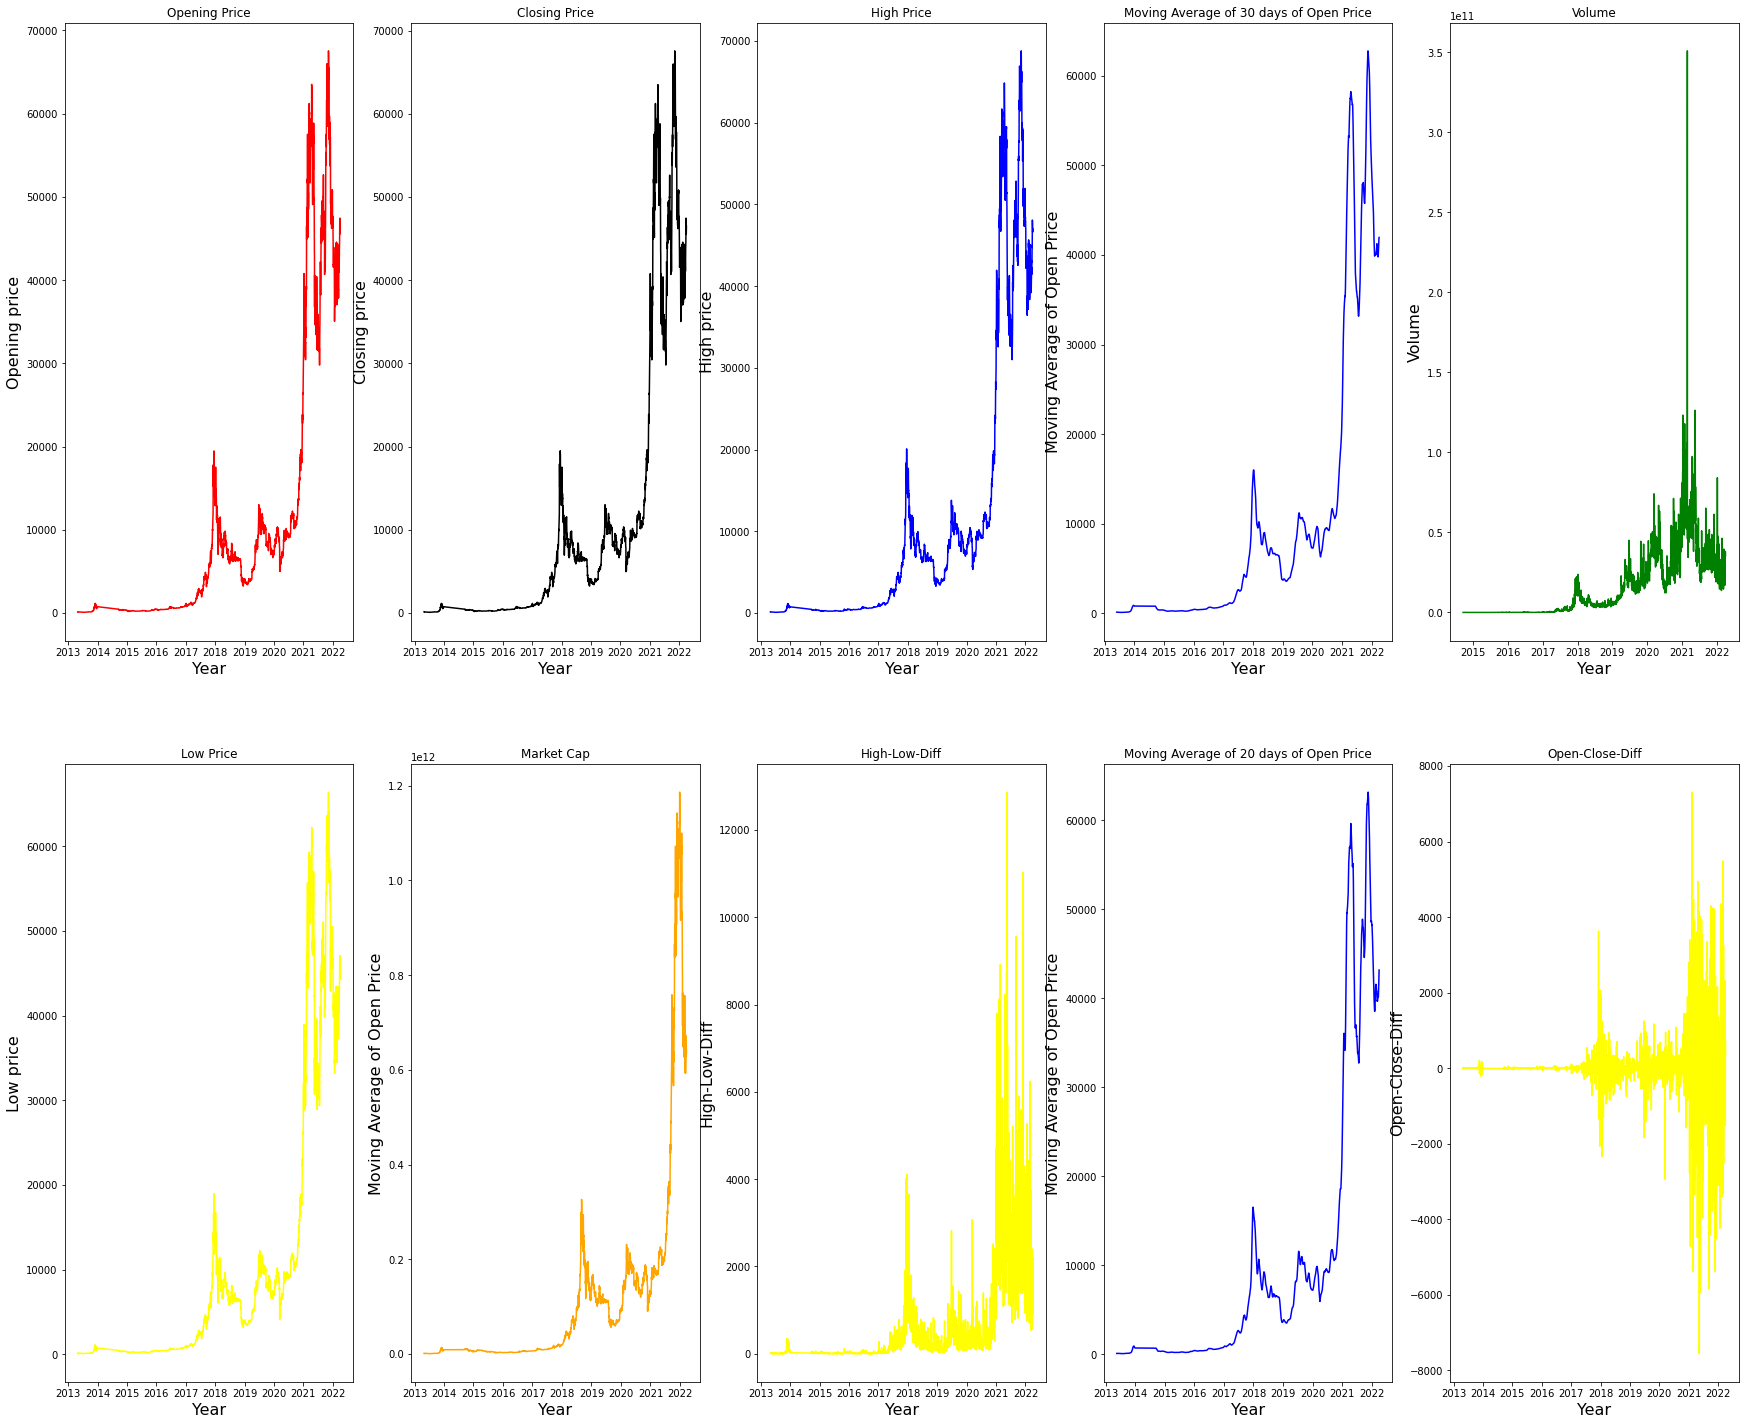

In [16]:
fig, ax2 = plt.subplots(2, 5, figsize=(30, 25))

ax2= ax2.flatten()
ax2[0].set_title("Opening Price")
ax2[0].set_xlabel("Year", fontsize=16)
ax2[0].set_ylabel("Opening price", fontsize=16) 
ax2[0].plot(df.Open, color="red", linestyle="-")

ax2[1].set_title("Closing Price")
ax2[1].set_xlabel("Year", fontsize=16)
ax2[1].set_ylabel("Closing price", fontsize=16)
ax2[1].plot(df.Close, color="black", linestyle="-")

ax2[2].set_title("High Price")
ax2[2].set_xlabel("Year", fontsize=16)
ax2[2].set_ylabel("High price", fontsize=16)
ax2[2].plot(df.High, color="blue", linestyle="-")

ax2[5].set_title("Low Price")
ax2[5].set_xlabel("Year", fontsize=16)
ax2[5].set_ylabel("Low price", fontsize=16)
ax2[5].plot(df.Low, color="yellow", linestyle="-")

ax2[4].set_title("Volume")
ax2[4].set_xlabel("Year", fontsize=16)
ax2[4].set_ylabel("Volume", fontsize=16)
ax2[4].plot(df.Volume, color="green", linestyle="-")

movingAverage = df.Open.rolling(window=30).mean()
ax2[3].set_title("Moving Average of 30 days of Open Price")
ax2[3].set_xlabel("Year", fontsize=16)
ax2[3].set_ylabel("Moving Average of Open Price", fontsize=16)
ax2[3].plot(movingAverage, color="blue", linestyle="-")

ax2[6].set_title("Market Cap")
ax2[6].set_xlabel("Year", fontsize=16)
ax2[6].set_ylabel("Moving Average of Open Price", fontsize=16)
ax2[6].plot(df.Marketcap, color="orange", linestyle="-")

ax2[7].set_title("High-Low-Diff")
ax2[7].set_xlabel("Year", fontsize=16)
ax2[7].set_ylabel("High-Low-Diff", fontsize=16)
ax2[7].plot(df['High-Low-Diff'], color="yellow", linestyle="-")

movingAverage = df.Open.rolling(window=20).mean()
ax2[8].set_title("Moving Average of 20 days of Open Price")
ax2[8].set_xlabel("Year", fontsize=16)
ax2[8].set_ylabel("Moving Average of Open Price", fontsize=16)
ax2[8].plot(movingAverage, color="blue", linestyle="-")

ax2[9].set_title("Open-Close-Diff")
ax2[9].set_xlabel("Year", fontsize=16)
ax2[9].set_ylabel("Open-Close-Diff", fontsize=16)
ax2[9].plot(df['Open-Close-Diff'], color="yellow", linestyle="-")

By studying the attributes of the data one by one, we can detect some important details about the price trends and volume relationships, which allows us to speculate about the publics' involvement to Bitcoin trading. One thing to notice is, when a sharp incraese in value of Bitcoin price happens, the high-low difference gets bigger. Some of this increase can be attributed to the upward increase, and other cause can be higher volatility in the price of Bitcoin. As is the case, large variations in the price of Bitcoin is common, and it becomes much more volatile in an upward or downward trend. Volume also increases and decrease within trends, and increase in volume happens in a higher degree than the price, possibly because of the investmens from the public to a volatile upward going currency.     

## **Visualizing price trends based on volume**

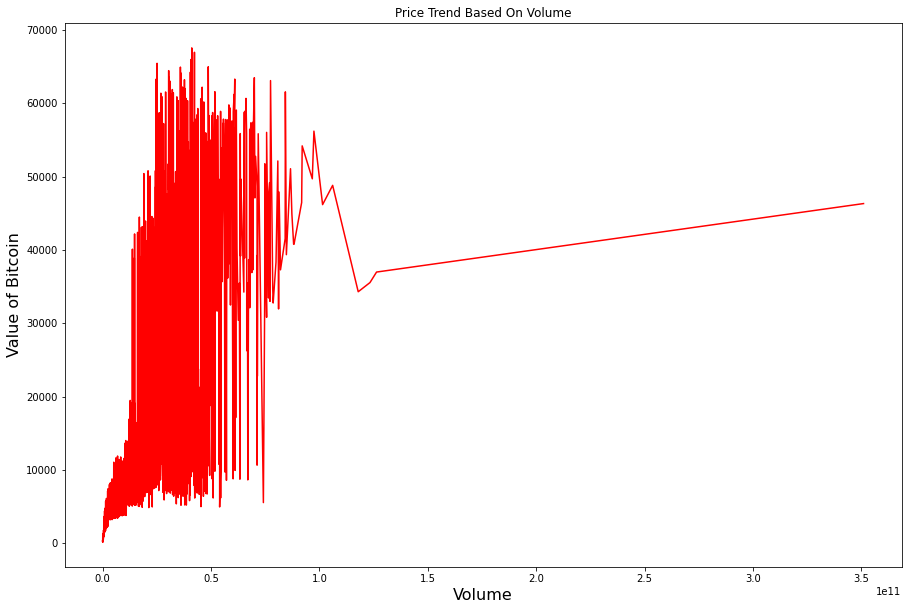

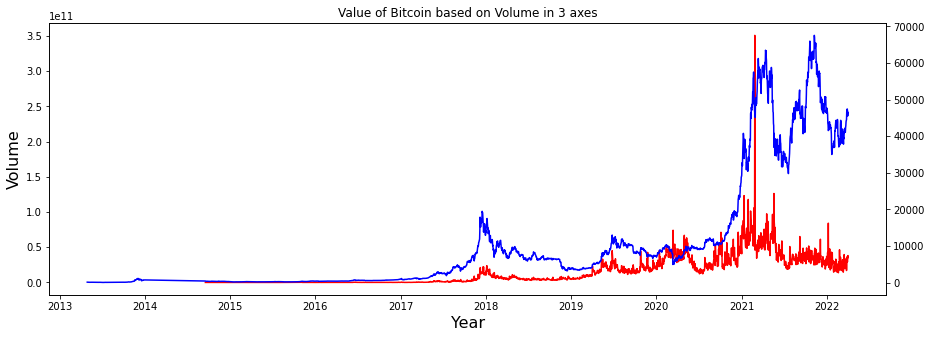

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 10))

dx= df.sort_values(by="Volume", ascending=False)

ax.set_title("Price Trend Based On Volume")
ax.set_xlabel("Volume", fontsize=16)
ax.set_ylabel("Value of Bitcoin", fontsize=16)
ax.plot(dx.Volume, dx.Close, color="red", linestyle="-")
plt.show()

fig, ax = plt.subplots(1, figsize=(15, 5))

ax.set_title("Value of Bitcoin based on Volume in 3 axes")
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Volume", fontsize=16) 
ax.plot(df.Volume, color="red", linestyle="-")
ax1 = ax.twinx()
ax1.plot(df.Close, color="blue", linestyle="-")

plt.show()

From this figure, it can be observed the upright trend in value of Bitcoin usually causes the volume of trade to increase as well, generally by a larger degree. The spike in volume follows the stark upward increase of the Bitcoin value, which likely in turn has contributed to the upward trend. It makes sense since the amount of people who invest their money into this, makes the market larger which attracts more investors and that causes more intersactions which causes value to increase.

---
Another trend to notice is the downward change in Bitcoin price following the huge spike in 2021, which can be attributed to the large amount of the volume may have been caused by the newer investers of Bitcoin in 2021, and those investors layed off their investments following the downward trend. 





## **Moving averages of 10 and 20 days of Bitcoin opening prices**


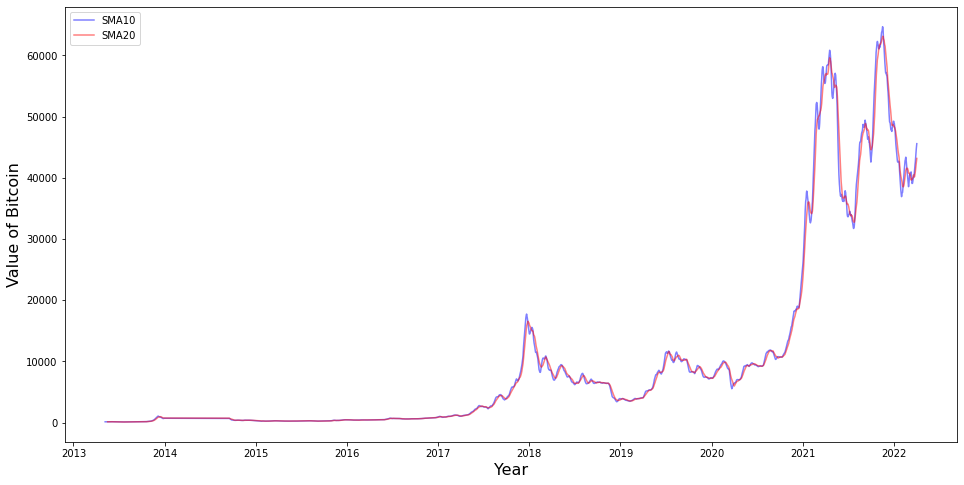

In [18]:
plt.figure(figsize=(16, 8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Value of Bitcoin", fontsize=16)
mo = df.Open.rolling(window=10).mean()
mc = df.Open.rolling(window=20).mean()
plt.plot(mo, color="blue", linestyle="-", label="SMA10", alpha=0.5)
plt.plot(mc, color="red", linestyle="-", label="SMA20", alpha=0.5)
plt.legend()
plt.show()

The moving averages of 10 and 20 days of Bitcoin opening value express the trends and price movements in a more clear way.

## **Moving averages of 10 and 20 days of Bitcoin high-low price difference**


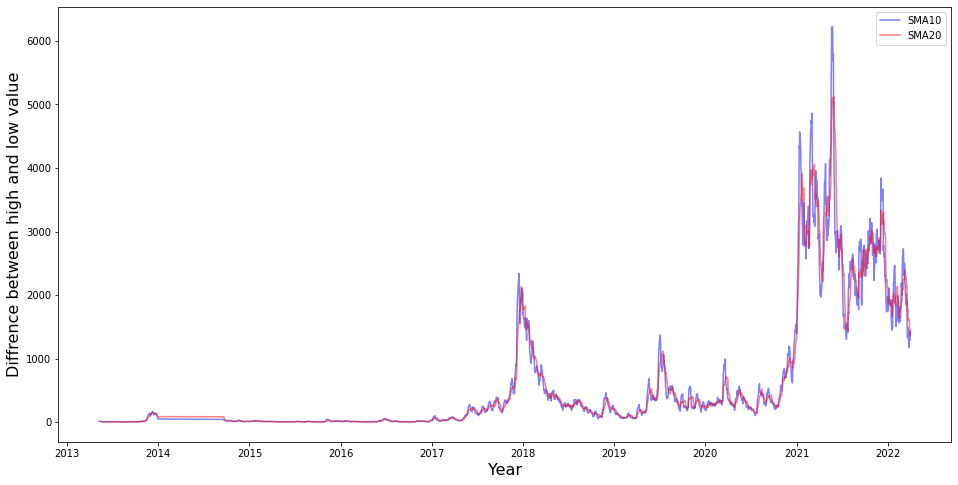

In [19]:
plt.figure(figsize=(16, 8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Diffrence between high and low value", fontsize=16)
mo = df['High-Low-Diff'].rolling(window=10).mean()
mc = df['High-Low-Diff'].rolling(window=20).mean()
plt.plot(mo, color="blue", linestyle="-", label="SMA10", alpha=0.5 )
plt.plot(mc, color="red", linestyle="-", label="SMA20", alpha=0.5 )
plt.legend()
plt.show()

By looking at moving averages of 10 and 20 days of the high-low difference of Bitcoin prices, it's made clear that Bitcoin prices have been very volatile between 2017 and 2022. Even the moving averages have sharp points, critical points. Upward and downward trends  

## **Analysis of the highest and lowest price of all time with respect to volume**

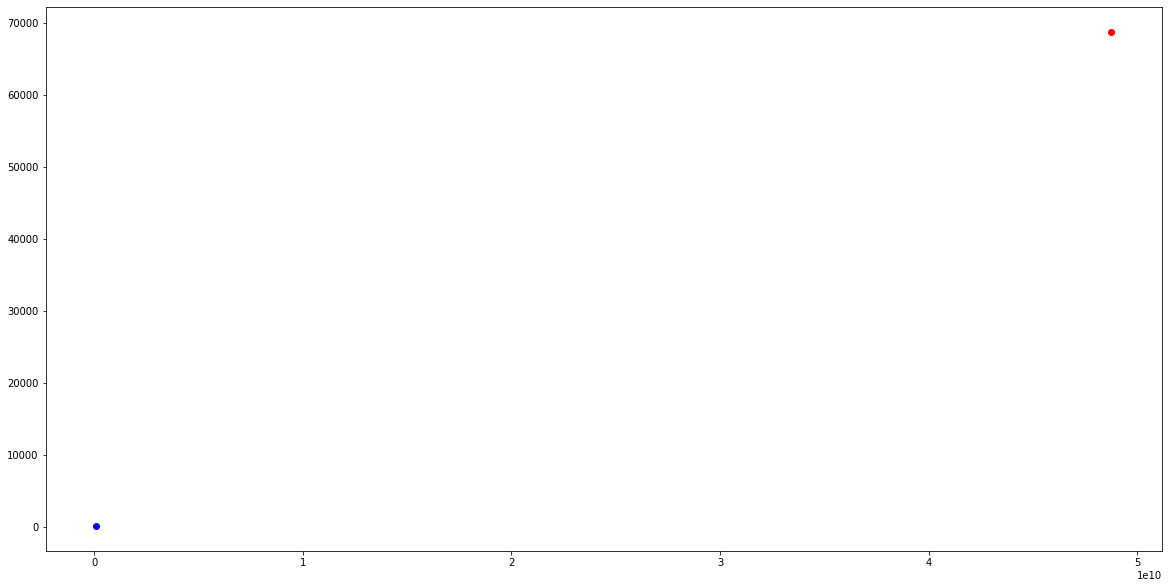

In [20]:
for a in df['Low']:
  if df['Volume'][df.index[df['Low'] == a ].tolist()][0] != None:
    lowest = a
    break
for a in df['Low']:
  if df['Volume'][df.index[df['Low'] == a ].tolist()][0] != None:
    if a <= lowest:
      if df['Volume'][df.index[df['Low'] == a ].tolist()][0] < df['Volume'][df.index[df['Low'] == lowest ].tolist()][0] and a == lowest:
        lowest = a
      else:
        lowest = a

max_price = max(df['High'])
max_price_volume = df['Volume'][df.index[df['High'] == max_price ].tolist()][0]
min_price_volume = df['Volume'][df.index[df['Low'] == lowest ].tolist()][0]


plt.figure(figsize=(20, 10))
plt.scatter(max_price_volume, max_price, color="red", label="Max Price")
plt.scatter(min_price_volume, lowest, color="blue", label="Min Price")
plt.show()

The merged dataset used in this explanatory data analysis part of this project include data points from 2013 till 2022, and the low point is a data point from 2013. The difference of the highest and lowest Bitcoin values are about 68000USD. The highest value of the Bitcoin between 2013-2022 is about 5200 times the lowest value. As it has been showed above, the volume of Bitcoin trade has also been in line with the Bitcoin price trend, and as expected the volume of trade when the highest value of Bitcoin has been observed is many magnitudes larger than that of the lowest price's. 

## **Comparison of open, close, high and low prices for selected time range**

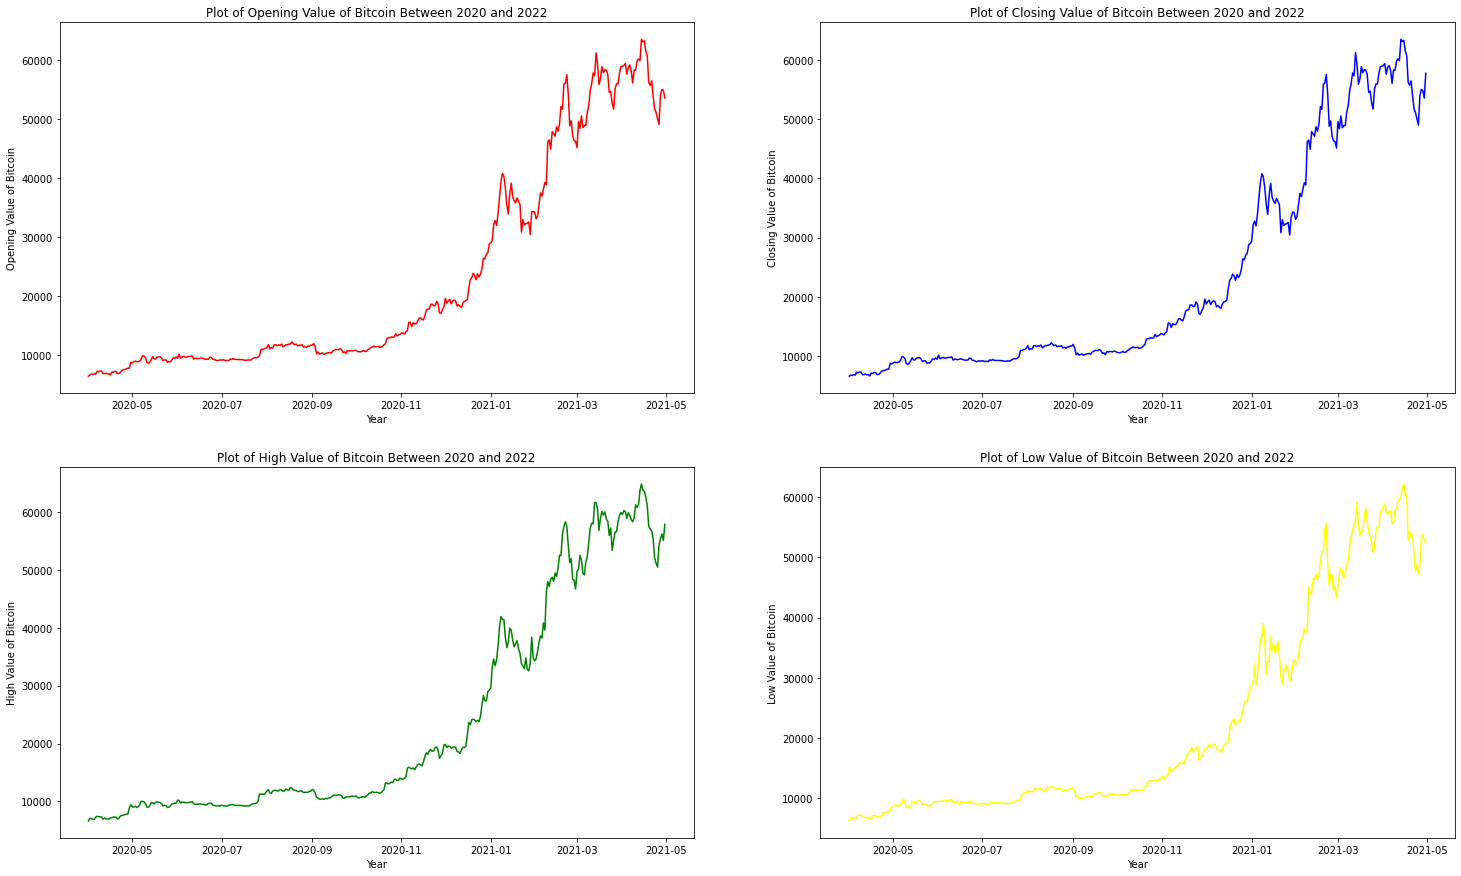

In [21]:
# We can take the interval between 2020 and 2021
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0][0].set_title("Plot of Opening Value of Bitcoin Between 2020 and 2022")
ax[0][0].set_xlabel("Year")
ax[0][0].set_ylabel("Opening Value of Bitcoin")
ax[0][0].plot(df['2020-04':'2021-04']['Open'], color="red", linestyle="-")

ax[0][1].set_title("Plot of Closing Value of Bitcoin Between 2020 and 2022")
ax[0][1].set_xlabel("Year")
ax[0][1].set_ylabel("Closing Value of Bitcoin")
ax[0][1].plot(df['2020-04':'2021-04']['Close'], color="blue", linestyle="-")

ax[1][0].set_title("Plot of High Value of Bitcoin Between 2020 and 2022")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("High Value of Bitcoin")
ax[1][0].plot(df['2020-04':'2021-04']['High'], color="green", linestyle="-")

ax[1][1].set_title("Plot of Low Value of Bitcoin Between 2020 and 2022")
ax[1][1].set_xlabel("Year")
ax[1][1].set_ylabel("Low Value of Bitcoin")
ax[1][1].plot(df['2020-04':'2021-04']['Low'], color="yellow", linestyle="-")

We noticed that the price trend is usually growing when we looked at the open, low, close, and high prices of Bitcoin. However, if we want to see where that surge began, we must look at the period between 2020 and 2021. Before 2020, Bitcoin's closing price typically hovered around $10,000 and seldom soared higher. However, following April 2020, we witness a massive spike in Bitcoin, which sparked an on-going rapid increase in price, surpassing 60000 and continuing on that path. This time period is significant since it coincides with the peak of Bitcoin's popularity.

## **Visualizations of Aggregated Forms Based on Features**

<BarContainer object of 3 artists>

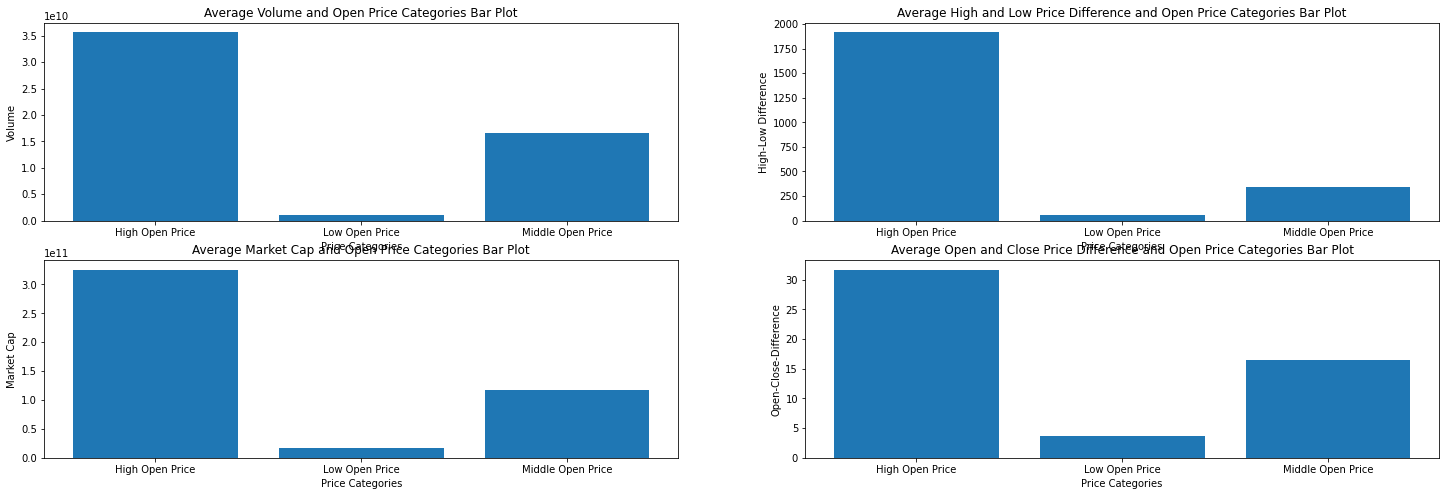

In [22]:
def categorizeOpenPrices(openPrice):
  if openPrice < 10000 and openPrice >= 5000:
    return "Middle Open Price"
  elif openPrice < 5000:
    return "Low Open Price"
  else:
    return "High Open Price"

df["OpenPriceClass"] = df["Open"].apply(categorizeOpenPrices)
open_price_group = df.groupby(by="OpenPriceClass")

fig, ax = plt.subplots(2, 2, figsize=(25, 8))

ax[0][0].set_title("Average Volume and Open Price Categories Bar Plot")
ax[0][0].set_xlabel("Price Categories")
ax[0][0].set_ylabel("Volume")
ax[0][0].bar(open_price_group["Volume"].mean().index, open_price_group['Volume'].mean())

ax[0][1].set_title("Average High and Low Price Difference and Open Price Categories Bar Plot")
ax[0][1].set_xlabel("Price Categories")
ax[0][1].set_ylabel("High-Low Difference")
ax[0][1].bar(open_price_group["High-Low-Diff"].mean().index, open_price_group["High-Low-Diff"].mean())

ax[1][0].set_title("Average Market Cap and Open Price Categories Bar Plot")
ax[1][0].set_xlabel("Price Categories")
ax[1][0].set_ylabel("Market Cap")
ax[1][0].bar(open_price_group["Marketcap"].mean().index, open_price_group["Marketcap"].mean())

ax[1][1].set_title("Average Open and Close Price Difference and Open Price Categories Bar Plot")
ax[1][1].set_xlabel("Price Categories")
ax[1][1].set_ylabel("Open-Close-Difference")
ax[1][1].bar(open_price_group["Open-Close-Diff"].mean().index, open_price_group["Open-Close-Diff"].mean())

We classified the opening prices in three of these graphs. Low volume, low high-low difference, close-open difference and low market cap are all factors that contribute to lower open prices. Low volume does not always imply that the price must be low, but the high-low difference of the digital currency at low open prices suggests that the price is growing very slowly. Also, the average market capitalization appears to be between 0 and 0.5, indicating that Bitcoin has yet to take hold of the current market. We notice a substantially stronger growth in all three metrics at medium prices, implying that higher volume and market capitalization have a direct impact on the currency's high-low and difference. We can see significant rise in volume, difference, and market capitalization at the present high open prices, which are between 10000 and 68000. Once again demonstrating that with increased client numbers and market capitalization, we see a significant increase in the differential, indicating that the price is rising.

## **Contiunation of Visualizations of Aggregated Forms Based on Features**

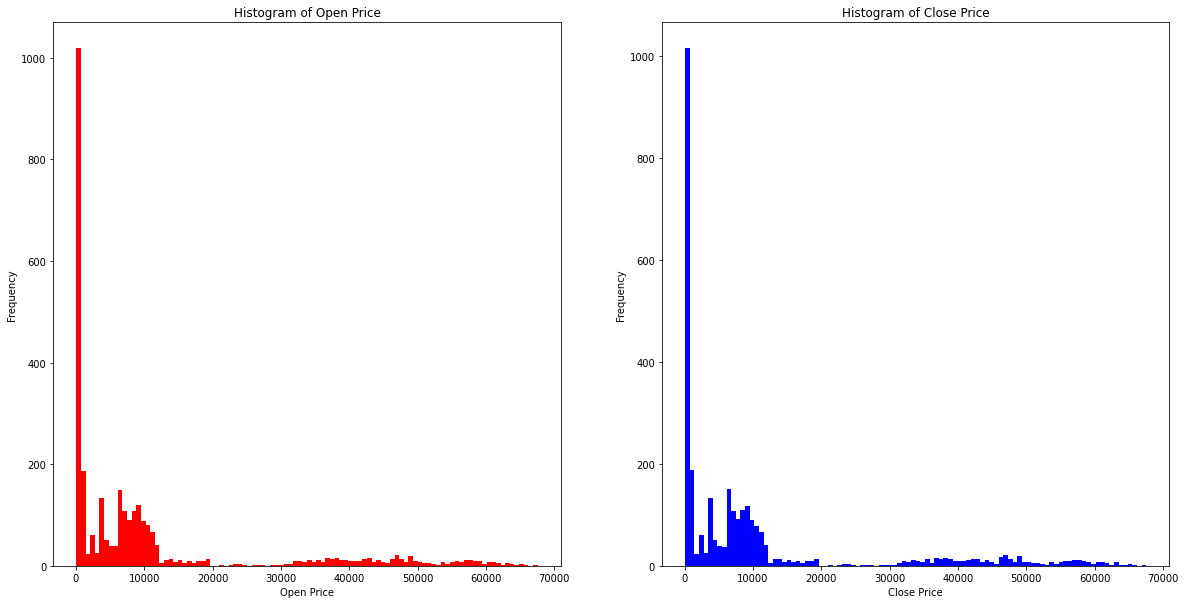

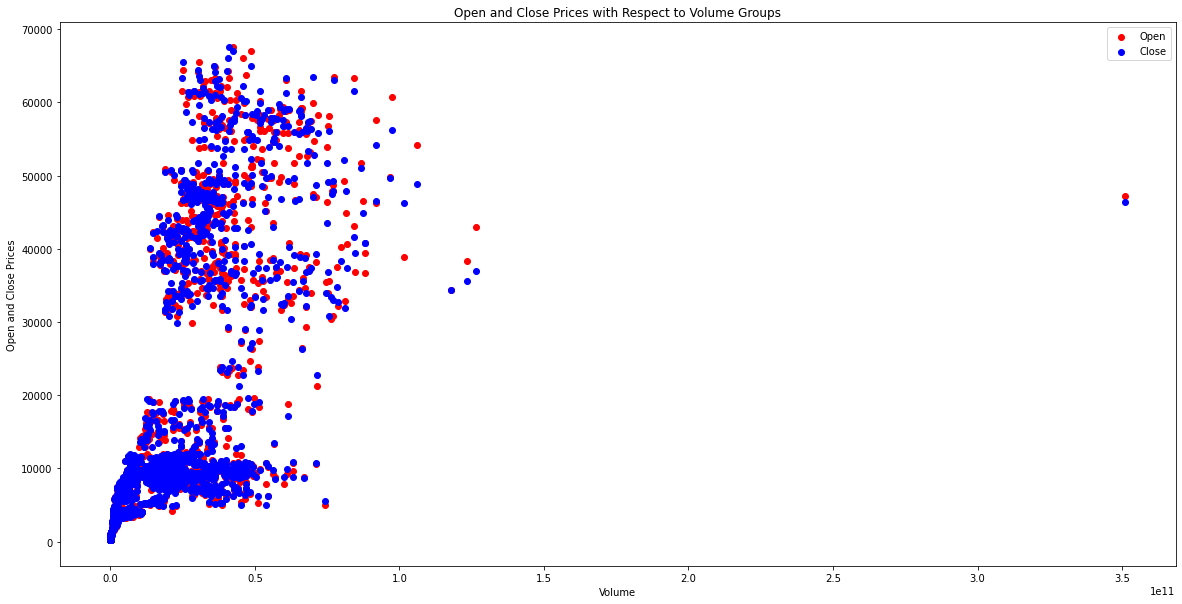

In [23]:
# Visualize open and close prices with respect to volume groups
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Histogram of Open Price")
ax[0].set_xlabel("Open Price")
ax[0].set_ylabel("Frequency")
ax[0].hist(df.Open, bins=100, color="red")

ax[1].set_title("Histogram of Close Price")
ax[1].set_xlabel("Close Price") 
ax[1].set_ylabel("Frequency")
ax[1].hist(df.Close, bins=100, color="blue")

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.set_title("Open and Close Prices with Respect to Volume Groups")
ax.set_xlabel("Volume")
ax.set_ylabel("Open and Close Prices")
ax.scatter(df['Volume'], df['Open'], color="red", label="Open")
ax.scatter(df['Volume'], df['Close'], color="blue", label="Close")
ax.legend()

Histograms of the opening and closing prices of the Bitcoin dataset are very similar, as could be expected. One thing these histograms tell is that for the longer duration of time, Bitcoin's price has stayed relatilevy low, between 0-12.000 USD.

Scatter plot of Volume-Opening and Closing Values also show that most of the time trade has been between 0-1e11 USD interval. A weak positive relationship between the price of the Bitcoin and volume of trade can also be observed. 

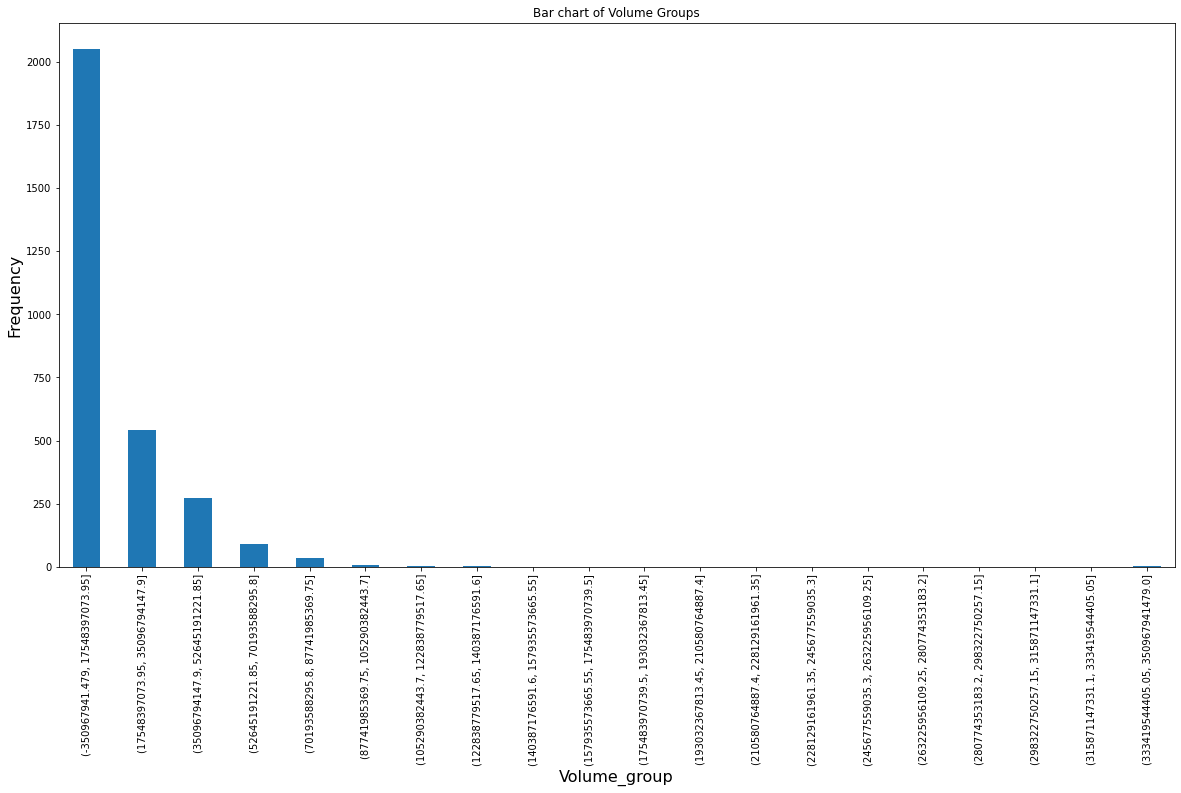

In [24]:
plt.figure(figsize=(20, 10))
plt.xlabel("Volume Group", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Bar chart of Volume Groups")
dd = df.groupby("Volume_group").size()
dd.plot.bar()
plt.show()

The distribution of rows to the left of the graph shows that most of the days the trade volume of Bitcoin has been between the first to the fourth intervals, and the few data points to the right of the graph can be attributed to the crypto rush in 2020-2021, as the volume time series charts above also indicate as such.  

# Statistical Analysis & Hypothesis Testing

## **Statistical tests to check how (or if) the volume and close features single manner contributes to opening price of the next day.** 

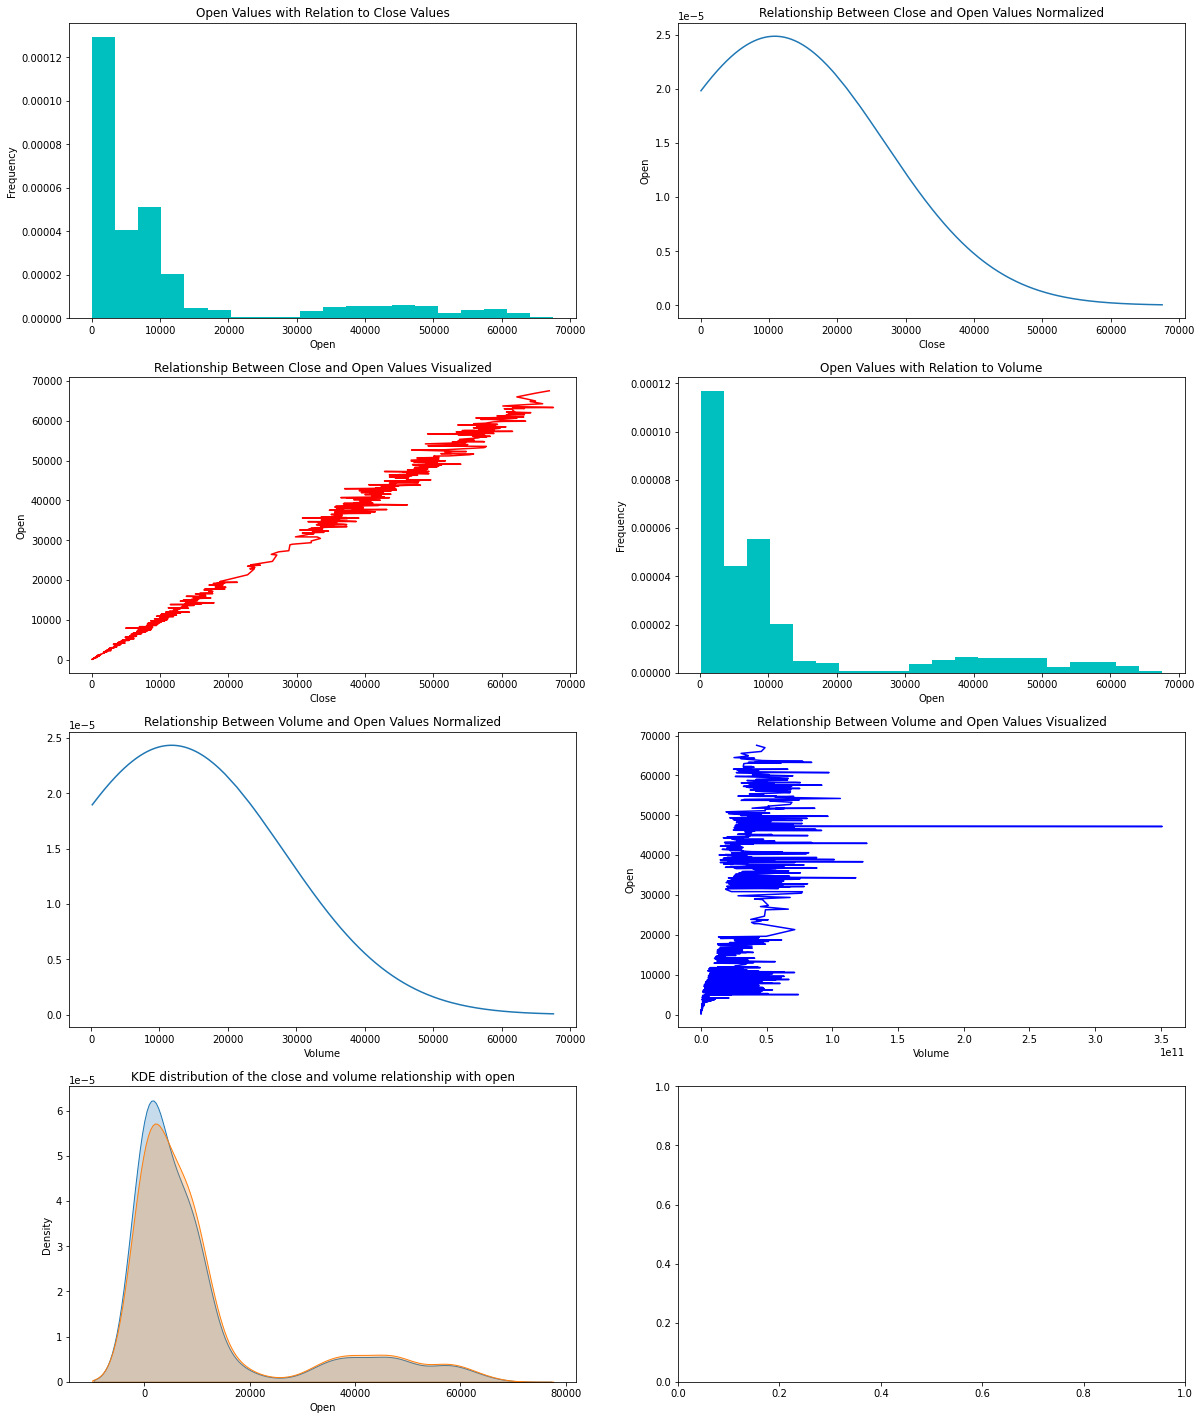

In [25]:
from matplotlib import axes
from scipy import stats
import seaborn as sns

df_mean_close = df.groupby(by = "Close")['Open'].mean().sort_values()
normal_close = stats.norm.pdf(df_mean_close, df_mean_close.mean(), df_mean_close.std())

df_mean_volume = df.groupby(by = "Volume")['Open'].mean().sort_values()
normal_volume = stats.norm.pdf(df_mean_volume, df_mean_volume.mean(), df_mean_volume.std())

fig, ax = plt.subplots(4, 2,figsize=(20, 25))

ax[0][0].set_title("Open Values with Relation to Close Values")
ax[0][0].set_xlabel("Open")
df_mean_close.plot(kind="hist",  ax=ax[0][0], bins=20, label="open", color="c", density=True)

ax[0][1].set_title("Relationship Between Close and Open Values Normalized")
ax[0][1].set_xlabel("Close")
ax[0][1].set_ylabel("Open")
ax[0][1].plot(df_mean_close, normal_close)

ax[1][0].set_title("Relationship Between Close and Open Values Visualized")
ax[1][0].set_xlabel("Close")
ax[1][0].set_ylabel("Open")
ax[1][0].plot(df_mean_close, color="red")

ax[1][1].set_title("Open Values with Relation to Volume")
ax[1][1].set_xlabel("Open")
df_mean_volume.plot(kind="hist", ax=ax[1][1], bins=20, label="open", color="c", density=True)

ax[2][0].set_title("Relationship Between Volume and Open Values Normalized")
ax[2][0].set_xlabel("Volume")
ax[2][0].plot(df_mean_volume, normal_volume)

ax[2][1].set_title("Relationship Between Volume and Open Values Visualized")
ax[2][1].set_xlabel("Volume")
ax[2][1].set_ylabel("Open")
ax[2][1].plot(df_mean_volume, color="blue")

ax[3][0].set_title("KDE distribution of the close and volume relationship with open")
sns.kdeplot(df_mean_close, shade = True, ax=ax[3][0])
sns.kdeplot(df_mean_volume, shade = True, ax=ax[3][0])

To see what occurs to opening values as a result of closing values and volume, We must set our null hypothesis where we argue that the close and volume values contributes to the opening values. To see if this is true let's look at the figures above. We can see from the statistics above that when the closing value rises, so does the opening value. This shows that these two features are linked. We can also see that most of the opening values are distributed around 10000 in the normalized graph and histogram display of closing values. As we can see from the chart above, there is no clear relationship between volume and opening values. We can also see that, similar to close value distribution, the majority of the density is dispersed around 10000 in the histogram and normalized graph, indicating that when the volume increases, the open value does not necessarily have to increase like close values. Lastly, to compare the two seperate distributions, we used KDE plot where the frequencies are mostly distributed around 10000 again but we got higher values for close which shows that close values are slightly more correlated with open compared to volume.

In [232]:
# T-test to see if there is a major difference between two samples.

In [26]:
stats.ttest_ind(df_mean_volume, df_mean_close)

Ttest_indResult(statistic=2.108230253442733, pvalue=0.03505429127452493)

By applying the T-Test, we can see that the there isn't major difference between the means of volume and close groups for opening values. Since p-value is less than 0.05, our null hypothesis above is true which means that volume and close values contributes to the opening values seperately. 

## **Statistical tests to check how (or if) the volume and close features in combined manner contributes to opening price of the next day.** 

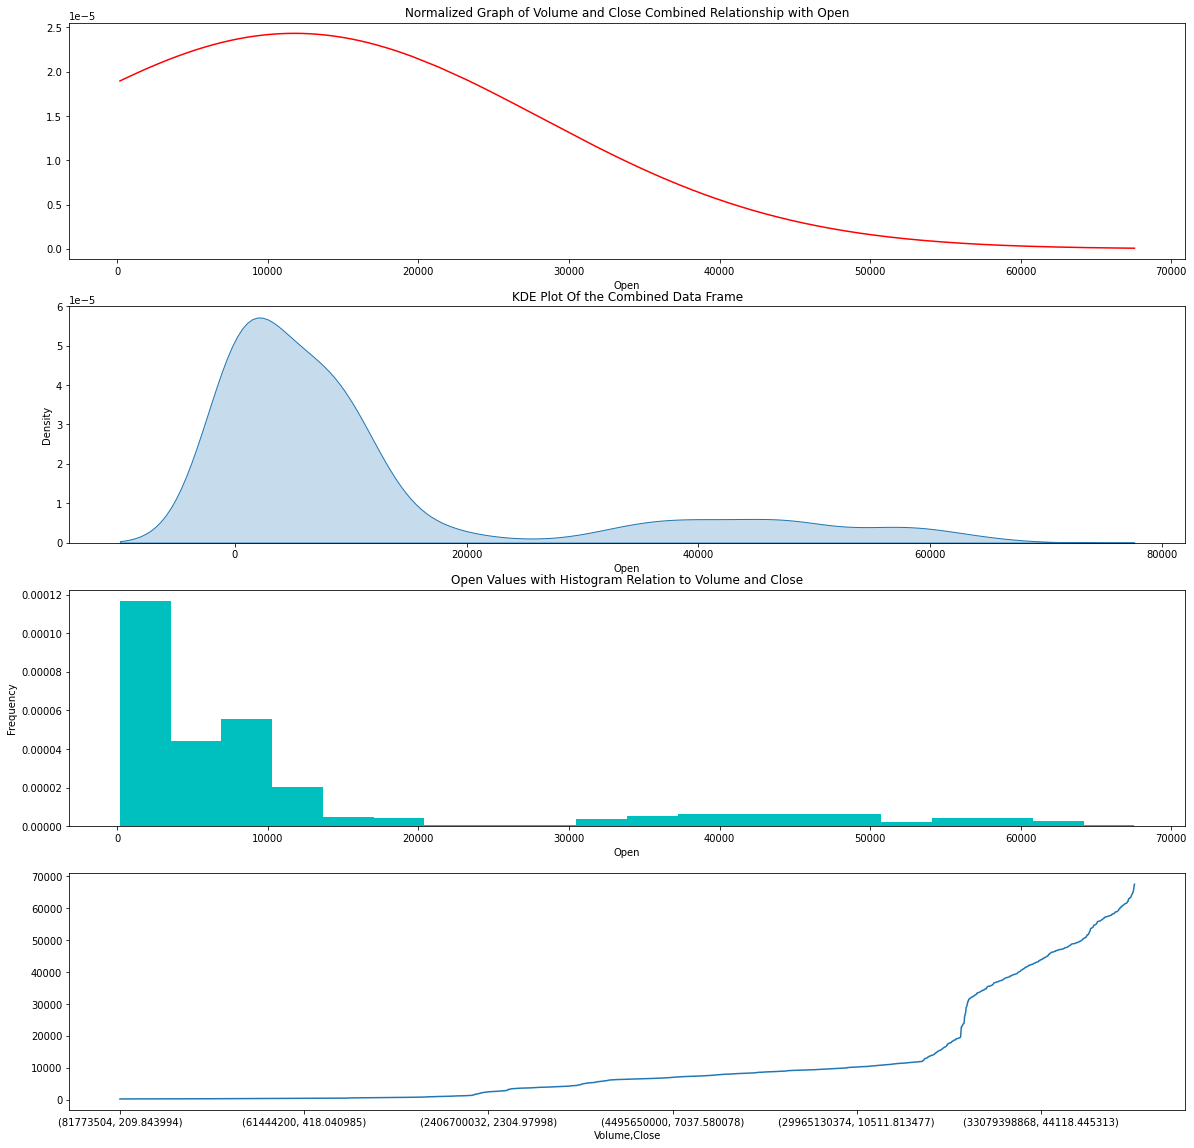

In [27]:
df_combined_mean = df.groupby(['Volume', 'Close'])['Open'].mean().sort_values()
df_combined_normal = stats.norm.pdf(df_combined_mean, df_combined_mean.mean(), df_combined_mean.std())

fig, ax = plt.subplots(4, 1, figsize=(10, 25))

ax[0].set_title("Normalized Graph of Volume and Close Combined Relationship with Open")
ax[0].set_xlabel("Open")
ax[0].plot(df_combined_mean, df_combined_normal, color="red")

ax[1].set_title("KDE Plot Of the Combined Data Frame")
sns.kdeplot(df_combined_mean, shade=True, ax=ax[1])

ax[2].set_title("Open Values with Histogram Relation to Volume and Close")
ax[2].set_xlabel("Open")
df_combined_mean.plot(kind="hist", ax=ax[2], bins=20, label="open", color="c", density=True)

df_combined_mean.plot(figsize=(20,20))

Previously we analyzed the affect of open and close values seperately. Now, we actually combined close and volume values into one group and extracted the open values from that group. From figures above, the histogram, KDE and normalized graph isn't very different from the seperate relations. And the last plot validates that the direct relation of close value with open and undirect relation of volume with open. Overall, from seperate and unseperate plots and analyze, we can say that close and volume values contributes to the opening values. 

As a null hypothesis, we state that there is significant difference between low and high prices with respect to open prices. When we apply the T-Test to determine if there are major differences between two samples mean values, we obtained the p-value as 0.14. Since 0.14 is greater than 0.05, we can state that our null hypothesis is false which means that there isn't a significant difference between two samples. Also from our graph, we can see that they look like very close to each other which is a good illustration to check the difference visually. 

## **Statistical tests on selected features**

Ttest_indResult(statistic=1.4675933016783749, pvalue=0.1422673544866348)


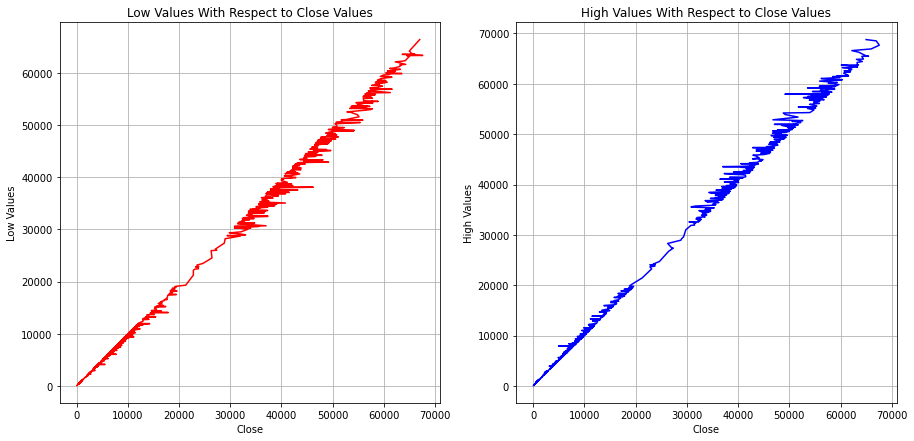

In [28]:
# Checking if there is a significant difference between low and high prices with respect to close prices.

df_low_withclose = df.groupby(by="Close")['Low'].mean().sort_values()
df_high_withclose = df.groupby(by="Close")['High'].mean().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("Low Values With Respect to Close Values")
ax[0].set_ylabel("Low Values")
df_low_withclose.plot(grid=True, ax=ax[0], color="red")

ax[1].set_title("High Values With Respect to Close Values")
ax[1].set_ylabel("High Values")
df_high_withclose.plot(grid=True, ax=ax[1], color="blue")

print(stats.ttest_ind(df_high_withclose, df_low_withclose))

For this analysis, we also set our null hypothesis to the same with the above. We argue that there is a huge difference between low and high prices with respect to close values. By applying T-Test, we found p-value as 0.1422 which is greater than 0.05 which makes our null hypothesis wrong. This means that there isn't a major difference between high and low values with respect to close values. You can also see the visualiziation above for low and high values. 

##  **Utilizing at least four new features using extra datasets in hypothesis testing**

Ttest_indResult(statistic=1.46728725835, pvalue=0.14235053434174455)


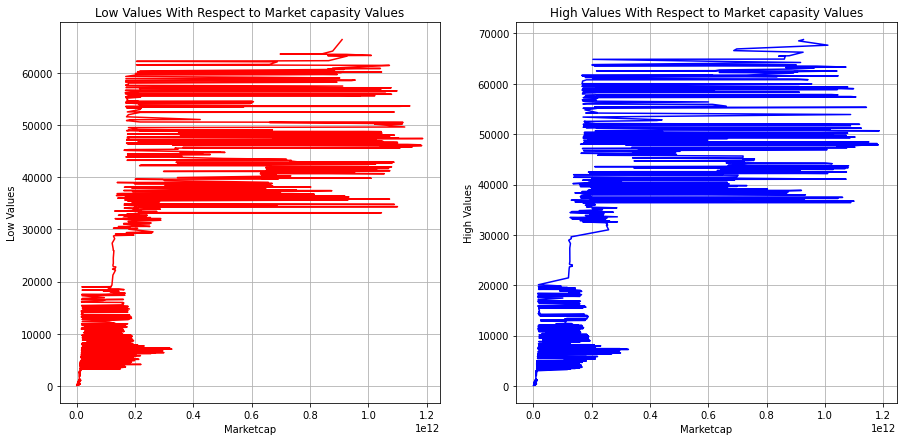

In [30]:
# Checking İf Market capasity has an affect on high and low values

df_marketcap_mean_low = df.groupby(by="Marketcap")['Low'].mean().sort_values()


df_marketcap_mean_high = df.groupby(by="Marketcap")['High'].mean().sort_values()


fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("Low Values With Respect to Market capasity Values")
ax[0].set_ylabel("Low Values")
df_marketcap_mean_low.plot(grid=True, ax=ax[0], color="red")

ax[1].set_title("High Values With Respect to Market capasity Values")
ax[1].set_ylabel("High Values")
df_marketcap_mean_high.plot(grid=True, ax=ax[1], color="blue")

print(stats.ttest_ind(df_marketcap_mean_high, df_marketcap_mean_low))

We state that Marketcap has an affect on high and low priceses of that they and this is our Null hypothesis.
 As we can see in the graphs they are close to each other however Market capasity seems to be not affect on the high and low values.
 When we apply the T-test to the result we see that the p-value is equal to
 0.14 which is smaller than 0.05 so this means there is no significant diffrence in this two samples as we predict.

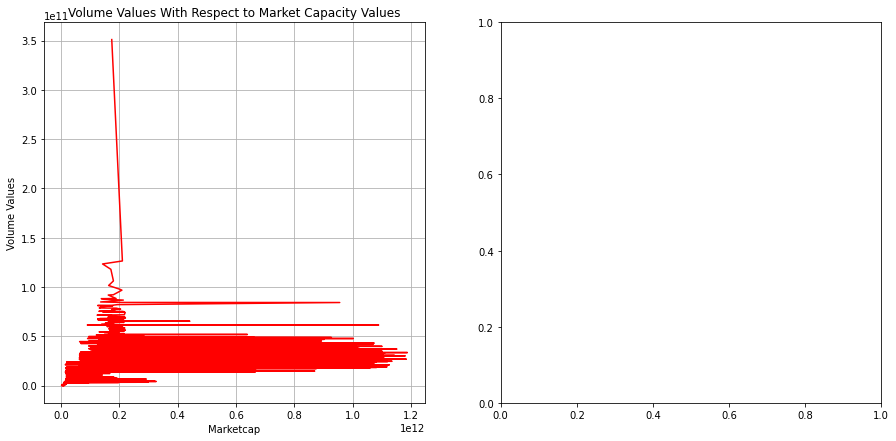

In [29]:
#Checking if market capacity has an affect on volume

df_marketcap_mean_V = df.groupby(by="Marketcap")['Volume'].mean().sort_values()

fig, ax = plt.subplots(1,2,figsize=(15, 7))

ax[0].set_title("Volume Values With Respect to Market Capacity Values")
ax[0].set_ylabel("Volume Values")
df_marketcap_mean_V.plot(grid=True, ax=ax[0], color="red")

We state same null hypothes as the above example and we get the similar results.
Market capasity has no affect on neither Low and high priceses or the Volume.

Ttest_indResult(statistic=-0.03386600548997013, pvalue=0.9729851285736801)


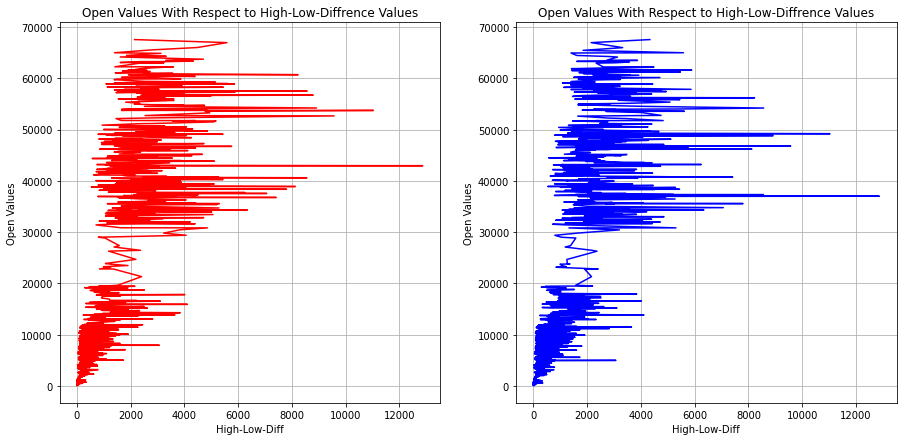

In [31]:
#Checking if High - Low diffrences has an affect on Open and Close price

df_HighLowDiff_mean_open = df.groupby(by="High-Low-Diff")['Open'].mean().sort_values()
df_HighLowDiff_mean_close = df.groupby(by="High-Low-Diff")['Close'].mean().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("Open Values With Respect to High-Low-Diffrence Values")
ax[0].set_ylabel("Open Values")
df_HighLowDiff_mean_open.plot(grid=True, ax=ax[0], color="red")

ax[1].set_title("Open Values With Respect to High-Low-Diffrence Values")
ax[1].set_ylabel("Open Values")
df_HighLowDiff_mean_close.plot(grid=True, ax=ax[1], color="blue")

print(stats.ttest_ind(df_HighLowDiff_mean_open, df_HighLowDiff_mean_close))

We state that High and low price diffrence in a day has an affect on opening and closing prices and we set this as our null hypothesis.
 As we can see in the graph there is no corralation beetween this two values.
 However when we use T-test beetween two values p value is actualy higher than 0.05 so that mean the are realy close to each other.

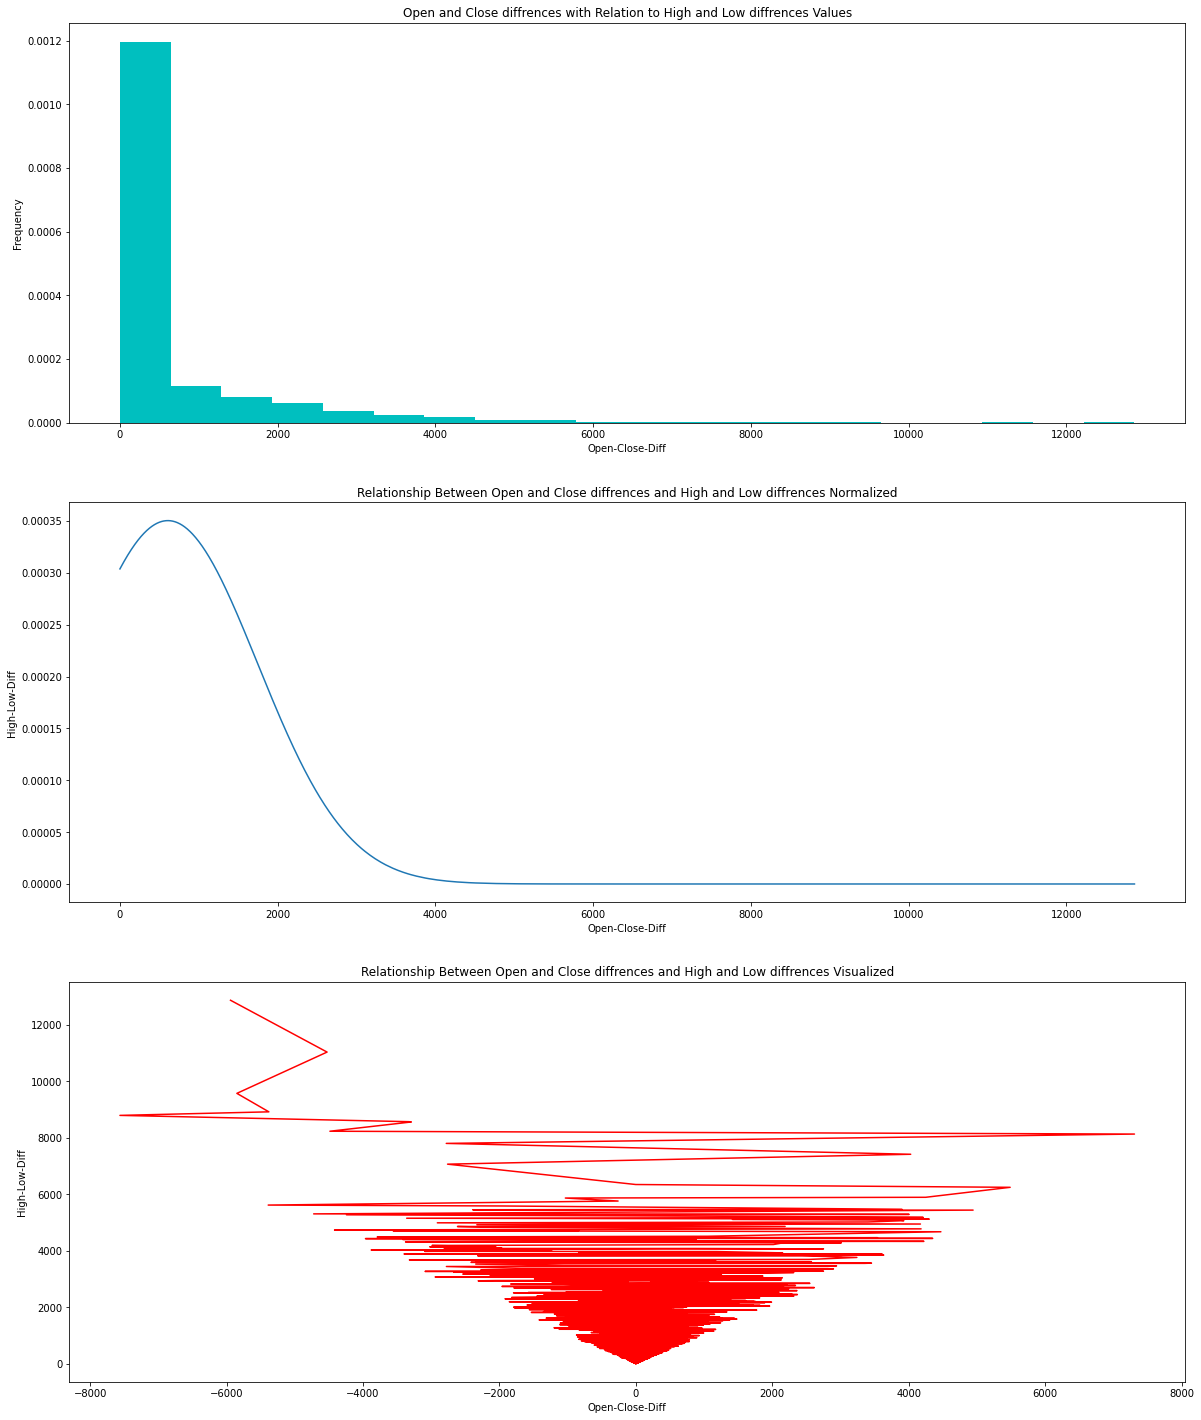

In [32]:
#Checking if Open and Close differences has an affect on High and Low differences price

df_OpenCloseDiff_mean = df.groupby(by="Open-Close-Diff")['High-Low-Diff'].mean().sort_values()
normal_OpenCloseDiff = stats.norm.pdf(df_OpenCloseDiff_mean, df_OpenCloseDiff_mean.mean(), df_OpenCloseDiff_mean.std())

fig, ax = plt.subplots(3, 1,figsize=(20, 25))

ax[0].set_title("Open and Close diffrences with Relation to High and Low diffrences Values")
ax[0].set_xlabel("Open-Close-Diff")
df_OpenCloseDiff_mean.plot(kind="hist",  ax=ax[0], bins=20, label="Open-Close-Diff", color="c", density=True)

ax[1].set_title("Relationship Between Open and Close diffrences and High and Low diffrences Normalized")
ax[1].set_xlabel("Open-Close-Diff")
ax[1].set_ylabel("High-Low-Diff")
ax[1].plot(df_OpenCloseDiff_mean, normal_OpenCloseDiff)

ax[2].set_title("Relationship Between Open and Close diffrences and High and Low diffrences Visualized")
ax[2].set_xlabel("Open-Close-Diff")
ax[2].set_ylabel("High-Low-Diff")
ax[2].plot(df_OpenCloseDiff_mean, color="red")


# Machine Learning


## **Prediction of opening price for a single day given all data of previous 30 days**

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preperation of data
new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['Open', 'Prediction'])
last_30_day = new_df.iloc[-30:]
last_30_day.set_index(np.arange(1,31),inplace = True)

prediction_days = 1 
last_30_day['Prediction'] = last_30_day['Open'].shift(-prediction_days)

x = np.array(last_30_day.drop(['Prediction'], 1))
x = x[:len(last_30_day) - prediction_days]

y = np.array(last_30_day['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(last_30_day.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

print(lr.score(x_test, y_test))
print(knn.score(x_test, y_test))
print(rf.score(x_test, y_test))
print(dt.score(x_test, y_test))

prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)
print(lr_prediction)

0.9391114325218033
0.8696850650459691
0.622731882733971
0.30340733146504606
[46002.35543075]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In this part, we calculated the price of Bitcoin for one day using data from the previous 30 days. Since we are looking at a very small interval, the scores were not very high for the models. To find the best performing model, we used the identical train data to train four alternative models and then compared the results. The best result came from linear regression in the end, but the knn's score was also rather good. We decided to utilize the linear regression model for our forecast because it produced the highest score. The model yielded the prediction price as 46002. This number appears to make sense because our actual open values in the BTC-USD.csv file for the last 30 days are extremely close to the predicted value, and since we employed the best performing model, we can assume that prediction value  will be our opening price for Bitcoin for a single day. 

## **Predicting N number of days into the future** and Giving ***Recommendation*** to Buy, Sell or Hold by Looking at the Opening price of the bitcoin at the last predicted day**

*   Model will predict the opening price for the next prediction_days of days into the future, by just inputting the Date field. 


*   It's trained on the Opening price of the past 3000-prediction days number of days.






###Data Processing to Predict Bitcoin Opening Price for prediction_days number of days to the future

In [34]:
new_df = df.copy(deep=True)

prediction_days = 30 #n = 30 days
new_df['Prediction'] = df[['Open']].shift(-prediction_days)

train_new_df = new_df.drop(new_df.tail(prediction_days).index)

new_df = pd.DataFrame(new_df, columns=['Open', 'Prediction'])
new_df.Open = new_df.Open.astype(np.int64)

new_df.tail(30)

,Open,Prediction
Date,,
2022-03-04,42458,NaN
2022-03-05,39148,NaN
2022-03-06,39404,NaN
2022-03-07,38429,NaN
2022-03-08,38059,NaN
2022-03-09,38742,NaN
2022-03-10,41974,NaN
2022-03-11,39439,NaN
2022-03-12,38794,NaN


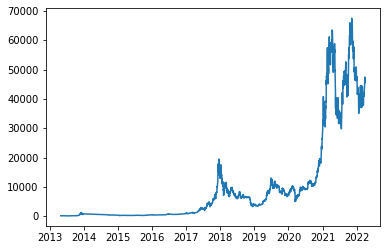

In [35]:
plt.plot(new_df.Open)

Creating another dataframe X_reg as the Opening prices of our dataset and removing last prediction_days days as we don't have prediction values for last prediction_days number of days.
y_reg are the predictions days of all dates in the dataset except the last prediction_days number of days.

In [36]:
X_reg = train_new_df['Open'].drop(train_new_df.tail(prediction_days).index)
X_reg = pd.DataFrame(X_reg, columns=['Open'])
y_reg = train_new_df['Prediction'].drop(train_new_df.tail(prediction_days).index)
y_reg = pd.DataFrame(y_reg, columns=['Prediction'])
y_reg['Prediction'] = y_reg['Prediction'].astype(np.int64)
y_reg

,Prediction
Date,
2013-04-29,129
2013-04-30,132
2013-05-01,128
2013-05-02,128
2013-05-03,129
...,...
2022-01-28,39098
2022-01-29,37706
2022-01-30,43194


In [37]:
x_future = train_new_df['Open'].tail(prediction_days)
x_future = pd.DataFrame(x_future, columns=['Open'])
x_future.Open.astype(np.int64)

y_future = train_new_df['Prediction'].tail(prediction_days)
y_future = pd.DataFrame(y_future, columns=['Prediction'])
y_future.Prediction.astype(np.int64)
y_future

,Prediction
Date,
2022-02-02,42458.140625
2022-02-03,39148.449219
2022-02-04,39404.199219
2022-02-05,38429.304688
2022-02-06,38059.902344
2022-02-07,38742.816406
2022-02-08,41974.070313
2022-02-09,39439.96875
2022-02-10,38794.464844


mean sqaured error:  20242928.63019165


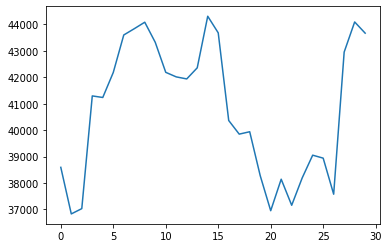

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

model_linear_future = LinearRegression()

model_linear_future.fit(X_reg, y_reg)
predictions = model_linear_future.predict(x_future)
lin_mse = mean_squared_error(y_future, predictions)
print("mean sqaured error: ", lin_mse)
plt.plot(predictions)

Predicting the opening prices of the Bitcoin for the next prediction_days number of days using the linear regression model.
Model prediction didn't improve with hyperparamater and performed significantly better than the other models with hyperparamater tuning.

In [39]:
last_pred = predictions[-1]
last_y_reg = y_reg.tail(1).values[0]
print(last_pred)
print(last_y_reg)
if last_pred > last_y_reg:
    print("buy")
elif last_pred < last_y_reg:
    print("sell")
else:
    print("hold")

[43668.65512289]
[43925]
sell


Check if the prediction at the prediction_days 'th day in the future is higher than the opening price of the Bitcoin at the last day.

## **Perform hyper-parameter tuning to increase model performance**

mean sqaured error:  20242928.63019165


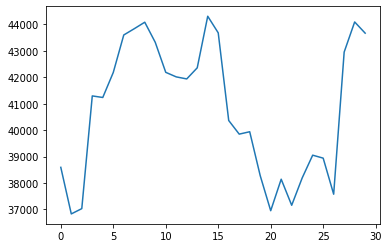

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

model_linear_future = LinearRegression()

model_linear_future.fit(X_reg, y_reg)
predictions = model_linear_future.predict(x_future)
lin_mse = mean_squared_error(y_future, predictions)
print("mean sqaured error: ", lin_mse)

# Last 30 days predicted without the open value, just with the Date index, trained on 2972 columns of Open prices and Date as index
# Will give recommendation on the result of the mean of 30 day opening price values
plt.plot(predictions)

Decision tree regressor with hyperparameter tuning, performance is significantly worse than the linear regression model.

mean sqaured error:  52179102.75900022


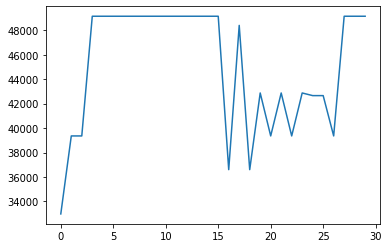

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor()
regression_parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
                         
dtc_grid = GridSearchCV(dtc, regression_parameters, cv=5)
dtc_grid.fit(X_reg, y_reg)
pred_dtc = dtc_grid.predict(x_future)
dtc_mse = mean_squared_error(y_future, pred_dtc)
print("mean sqaured error: ", dtc_mse)
plt.plot(pred_dtc)

Random Forest Regressor with hyperparamater tuning, performance is marginally better than classic decision tree regressor but still significantly worse than the linear regression model.



Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversi

mean sqaured error:  49406404.31201093


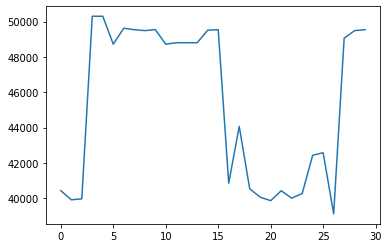

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
regression_parameters = {'n_estimators': [ 100],
                            'max_depth': [1, 2, 3, 4, 5, 6, ],
                            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search_rand = GridSearchCV(rf, regression_parameters, cv=5)
grid_search_rand.fit(X_reg, y_reg)
pred_rand = grid_search_rand.predict(x_future)
rand_mse = mean_squared_error(y_future, pred_rand)
print("mean sqaured error: ", rand_mse)
plt.plot(pred_rand)

Multi layer perceptopm regression with hyperparamater tuning, performance is close to the linear regression model, but training takes longer than the other models.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'max_iter': 300, 'solver': 'adam'}
mean sqaured error:  20780036.188000288


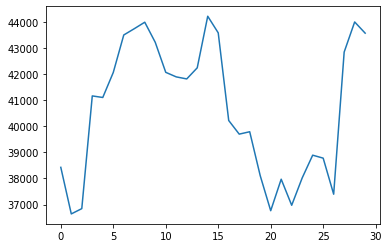

In [43]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp_parameters = {'hidden_layer_sizes': [(10),(10,10), (10,10,10), (100), (100, 100)],
                    'activation': ['relu'],
                    'solver': ['adam'],
                    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900]}
mlp_grid = GridSearchCV(mlp, mlp_parameters, cv=5, verbose=0)
mlp_grid.fit(X_reg, y_reg)
pred_mlp = mlp_grid.predict(x_future)
print("best parameters: ", mlp_grid.best_params_)
mlp_mse = mean_squared_error(y_future, pred_mlp)
print("mean sqaured error: ", mlp_mse)
plt.plot(pred_mlp)

##  **Predict trends of all features (open, high, low, close, adj close, volume) for the future time span from 09 March 2022 to 09 September 2022**

0.6423193858234038


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


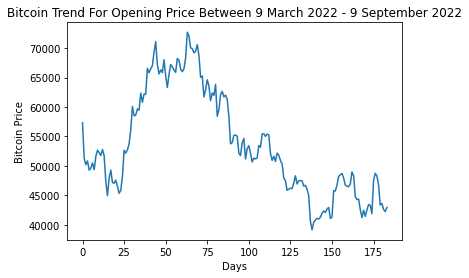

In [44]:
# Let's predict open prices first.

new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['Open', 'Prediction'])
new_df = new_df.iloc[:-24]
new_df.set_index(np.arange(1,3003-24),inplace = True)
prediction_days = 184 # There are 184 days between 9'th of march and 9'th of September
new_df['Prediction'] = new_df['Open'].shift(-prediction_days)

x = np.array(new_df.drop(['Prediction'], 1))
x = x[:len(new_df) - prediction_days]

y = np.array(new_df['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(new_df.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)

print(lr.score(x_test, y_test))

plt.xlabel("Days")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Trend For Opening Price Between 9 March 2022 - 9 September 2022")
plt.plot(lr_prediction)

When we plot the trend for the next 184 days, we can see that the price goes up to it's maximum around 50 days later than the 9'th of March. Also the lowest is observed around 140'th day after 9'th of March. It seems that buying the Bitcoin right around beginning of April and selling it around the middle of May would give us the highest profit. But it should be noted the accuracy of this score is not very high because it seems that applying linear regression for a non-linear graph isn't the most accurate model. But, because linear regression is the fastest, we are going to keep using it. 

0.6714713649766268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


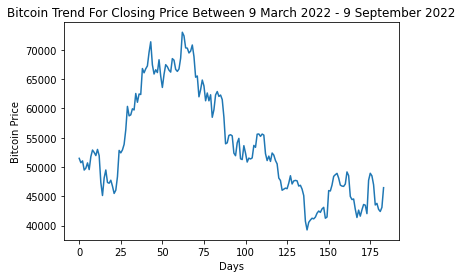

In [45]:
# Now let's predict close prices.

new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['Close', 'Prediction'])
new_df = new_df.iloc[:-24]
new_df.set_index(np.arange(1,3003-24),inplace = True)

prediction_days = 184 # There are 184 days between 9'th of march and 9'th of September
new_df['Prediction'] = new_df['Close'].shift(-prediction_days)

x = np.array(new_df.drop(['Prediction'], 1))
x = x[:len(new_df) - prediction_days]

y = np.array(new_df['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(new_df.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)

print(lr.score(x_test, y_test))

plt.xlabel("Days")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Trend For Closing Price Between 9 March 2022 - 9 September 2022")
plt.plot(lr_prediction)

It looks like the close price trend follows the same trend with open price. It makes sense because we saw that their prices are almost the samme at explatory data analysis.

0.649141643538083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


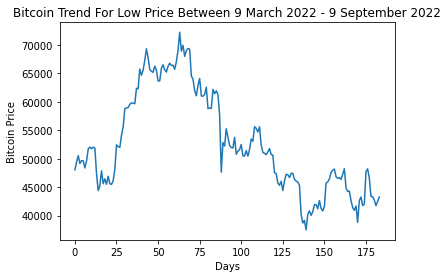

In [46]:
# Now let's predict low prices.

new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['Low', 'Prediction'])

new_df = new_df.iloc[:-24]
new_df.set_index(np.arange(1,3003-24),inplace = True)

prediction_days = 184 # There are 184 days between 9'th of march and 9'th of September
new_df['Prediction'] = new_df['Low'].shift(-prediction_days)

x = np.array(new_df.drop(['Prediction'], 1))
x = x[:len(new_df) - prediction_days]

y = np.array(new_df['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(new_df.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)

print(lr.score(x_test, y_test))

plt.xlabel("Days")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Trend For Low Price Between 9 March 2022 - 9 September 2022")
plt.plot(lr_prediction)

The low price trends also follows the same trend with open price trend and close price trend. We can make the same argument as we did in the close price trend because statistics and hypothesis testings indicated that low prices doesn't have very significant difference with respect to open and close prices.

0.6516125178274734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


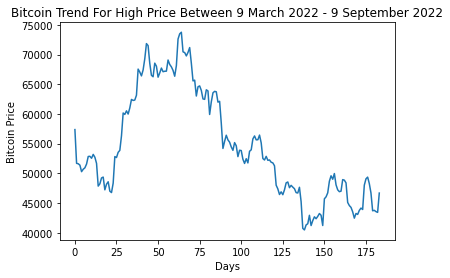

In [47]:
# Now let's predict high prices.

new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['High', 'Prediction'])
new_df = new_df.iloc[:-24]
new_df.set_index(np.arange(1,3003-24),inplace = True)

prediction_days = 184 # There are 184 days between 9'th of march and 9'th of September
new_df['Prediction'] = new_df['High'].shift(-prediction_days)

x = np.array(new_df.drop(['Prediction'], 1))
x = x[:len(new_df) - prediction_days]

y = np.array(new_df['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(new_df.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)

print(lr.score(x_test, y_test))

plt.xlabel("Days")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Trend For High Price Between 9 March 2022 - 9 September 2022")
plt.plot(lr_prediction)

High price trend also follows the same trend with other 3 trends. We can say the same thing with the low price trend since we observed that open and close price trends are very close to high and low price trends.

0.16173801357488238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


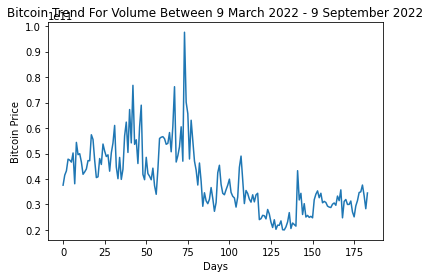

In [48]:
# Now let's predict volume.

new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['Volume', 'Prediction'])
new_df = new_df.iloc[:-24]
new_df.set_index(np.arange(1,3003-24),inplace = True)

prediction_days = 184 # There are 184 days between 9'th of march and 9'th of September
new_df['Prediction'] = new_df['Volume'].shift(-prediction_days)
new_df = new_df.dropna()

x = np.array(new_df.drop(['Prediction'], 1))
x = x[:len(new_df) - prediction_days]

y = np.array(new_df['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(new_df.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)

print(lr.score(x_test, y_test))

plt.xlabel("Days")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Trend For Volume Between 9 March 2022 - 9 September 2022")
plt.plot(lr_prediction)

From this graph we can observe that the amount of intersections are going to sky rocket around the middle of June meaning that interest in Bitcoin is going to increase. But after June, the interest seems to drop immensely which explains why the price trends of close, open, low and high values behave as they are in the graphs above.

0.4606189821084594


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


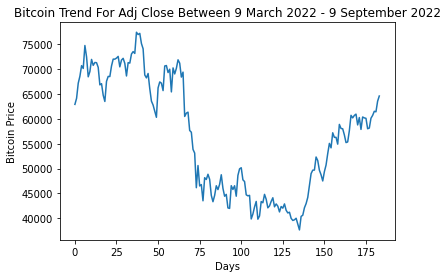

In [49]:
# Now let's predict adj close volume.

new_df = df.copy(deep=True)
new_df = pd.DataFrame(new_df, columns=['Adj Close', 'Prediction'])
new_df = new_df.iloc[:-24]
new_df.set_index(np.arange(1,3003-24),inplace = True)

prediction_days = 184 # There are 184 days between 9'th of march and 9'th of September
new_df['Prediction'] = new_df['Adj Close' ].shift(-prediction_days)
new_df = new_df.dropna()

x = np.array(new_df.drop(['Prediction'], 1))
x = x[:len(new_df) - prediction_days]

y = np.array(new_df['Prediction'])
y = y[:-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
prediction_days_array = np.array(new_df.drop(['Prediction'], 1))[-prediction_days:]

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction_array = lr.predict(x_test)
lr_prediction = lr.predict(prediction_days_array)

print(lr.score(x_test, y_test))

plt.xlabel("Days")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Trend For Adj Close Between 9 March 2022 - 9 September 2022")
plt.plot(lr_prediction)

Adj Close values seems to increase to it's maximum around the end of May and see it's minimum at July. And it starts to increase right after August and keeps that trend.